# Part 1: Regression analysis of Gapminder data

## Basic Data Preprocessing

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model
from statsmodels.formula.api import ols

In [3]:
!ls

 08_gap-every-five-years.tsv  'CMSC 320 => Project 3.ipynb'   work


In [5]:
data = pd.read_csv('08_gap-every-five-years.tsv', sep='\t')
data

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [7]:
# renaming columns for conveinence and giving better col names
data.columns = ['country', 'continent', 'year', 'life_exp', 'pop', 'gdp']
data

,country,continent,year,life_exp,pop,gdp
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


## Exercise 1: Make a scatter plot of life expectancy across time.

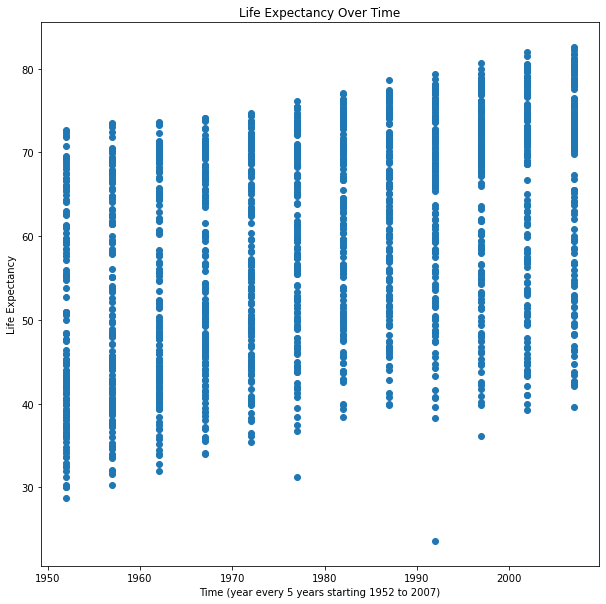

In [17]:
# setting size of graph
plt.figure(figsize=(10,10))
# setting labels and titles of graph
plt.title('Life Expectancy Over Time')
plt.xlabel('Time (year every 5 years starting 1952 to 2007)')
plt.ylabel('Life Expectancy')
# retrieving data and splotting it via pyplot.scatter
x = data['year']
y = data['life_exp']
plt.scatter(x,y)
plt.show()

## Question 1: Is there a general trend (e.g., increasing or decreasing) for life expectancy across time? Is this trend linear? (answering this qualitatively from the plot, you will do a statistical analysis of this question shortly)

There seems to be a general upward/increasing trend for life expectancy over time. This trend generally looks to be linear, however, if we see the upper portion of life expectancy, it seems to resemble a ReLU graph more than a straight line. It seems that growth in life expectancy tapered off until 1972, but after which growth started becoming linear again. Similarly but in inverse, if we look at the bottom portion of the graph, it looks like a "reverse ReLU" in the sense that growth in life expectancy was linear until about 1987, after which life expectancy growth stagnated. 

## Displaying Violin Plot

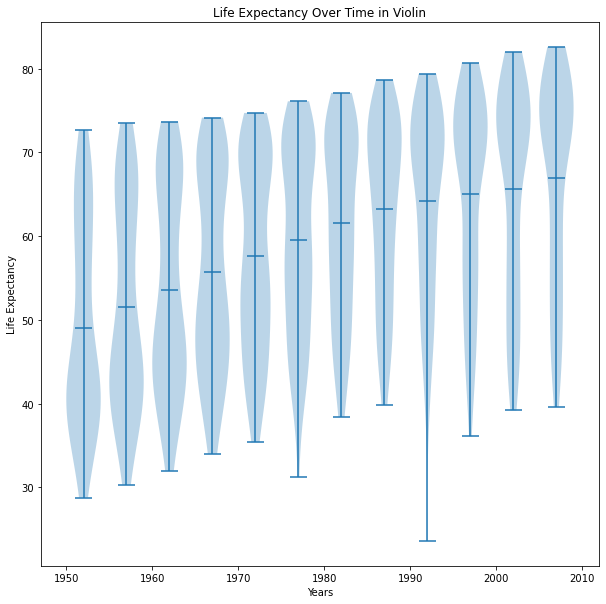

In [19]:
# setting figure size and assigning graph title and x & y labels
plt.figure(figsize=(10,10))
plt.title('Life Expectancy Over Time in Violin')
plt.xlabel('Years')
plt.ylabel('Life Expectancy')

# cycling through and adding every country's life expectancy per year in a list
lfst = []
for y in data['year'].unique(): 
    data_y = data[data['year'] == y]
    lfst.append(data_y['life_exp'])

# plotting violin graph
plt.violinplot(lfst, data['year'].unique(), widths=4, showmeans=True)
plt.show()

## Question 2: How would you describe the distribution of life expectancy across countries for individual years? Is it skewed, or not? Unimodal or not? Symmetric around it’s center?

The distribution starts off **skewed, bimodal, and assymmetric in nature in 1952**. Intuitively, this can be explained due to World War II: Europe and Asia were devestated due to WWII, and most european and asian colonies were heavily plundered due to the war (however many were just regularly plundered and impoverished). Hence, a large percentage of the population saw a drastic decrease in quality of life and availability of food.

The distribution evolves into a **unimodal distribution that is negatively skewed and but still assymmetric by 2007**. This makes sense as well since most of the newly freed African and Asian countries started to catch up with the rest of the world when it came to health technology and infrastructure, and food shortages and famines became far less prominent. This also coincides with higher per capita output (GDP), since more output leads to less shortage. 

At no point is the distribution symmetric about its mean, ie at no point do we have a **symmetric unimodal distribution** where **mean = mode**. This makes sense as there are always going to be a few countries in the midst of war (such as Afghanistan, Ethiopia, etc.) that act as outliers compared to most other countries, hence causing the mean to be skewed their way by a slight bit.

## Question 3: Suppose I fit a linear regression model of life expectancy vs. year (treating it as a continuous variable), and test for a relationship between year and life expectancy, will you reject the null hypothesis of no relationship? (do this without fitting the model yet. I am testing your intuition.)

In terms of testing *whether* a relationship does in fact exist between one variable regressed by another, the hypothesis we are trying to test is **does the coefficient parameter = 0?**

Hence, given a linear regression model: **Y = A + BX + U**, does **B = 0?** This is how we test *if X has an effect on Y* because if X did not have an effect on Y, then **B = 0**.

We can conduct our hypothesis test as follows:

H0: **B = 0**

HA: **B != 0**

Intuitively, given the tremondous amount of economic growth we have seen in the post-war world, we would in fact **reject the null** as there is bound to be a strong correllation between the year and life expectancy. Long run growth has been very prominent in most Asian, European, and African countries, and as output per capita grows, so does income per capita. With higher incomes, people are able to afford basic goods and services such as food and water, along with more complex services such as specialized medicine etc. 

***Note:*** for all of these, we are testing whether the true population parameter B equals to 0

## Question 4: What would a violin plot of residuals from the linear model in Question 3 vs. year look like? (Again, don’t do the analysis yet, answer this intuitively)

It would look similar to the current violin plot as there should still be a linear relationship present. This is because we moved from a somewhat bimodal distribution where the lower half was Europe, Asia, and Africa to a more unimodal distribution hence there had to be countries that rapidly improved health infrastructure.

## Question 5: According to the assumptions of the linear regression model, what should that violin plot look like? That is, consider the assumptions the linear regression model you used assumes (e.g., about noise, about input distributions, etc); do you think everything is okay?

The violin plot should look like a normal distribution centered about 0 with a variance of σ^2. This relates to a few key assumptions about linear regressions (and particularly about the algorithm we use to calculate linear regressions ie OLS). A key assumption being E(u|x1, x2, ...) = 0 and Var(u|x1,x2,...) = σ^2.

## Exercise 2: Fit a linear regression model using, e.g., the LinearRegression function from Scikit-Learn or the closed-form solution, for life expectancy vs. year (as a continuous variable). There is no need to plot anything here, but please print the fitted model out in a readable format.

In [36]:
# defining and training model
model = linear_model.LinearRegression()
x = np.array(data['year']).reshape(len(data['year']),1)
y = data['life_exp']
model.fit(x,y)

LinearRegression()

In [41]:
print('Our model is: Y = A + BX')
print('Intercept/A: {}'.format(model.intercept_))
print('Weight/B: {}'.format(model.coef_[0]))
print('R^2: {}'.format(model.score(x,y)))

Our model is: Y = A + BX
Intercept/A: -585.6521874415375
Weight/B: 0.32590382763714815
R^2: 0.18975713852188825


Doing the same thing here as above, but I just like the classic stata output from a linear regression model because it gives a lot more useful information.

In [44]:
model_classic = ols(formula='life_exp~year', data=data).fit()
print(model_classic.summary())

                            OLS Regression Results                            
Dep. Variable:               life_exp   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     398.6
Date:                Mon, 26 Apr 2021   Prob (F-statistic):           7.55e-80
Time:                        02:28:46   Log-Likelihood:                -6597.9
No. Observations:                1704   AIC:                         1.320e+04
Df Residuals:                    1702   BIC:                         1.321e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -585.6522     32.314    -18.124      0.0

## Question 6: On average, by how much does life expectancy increase every year around the world?

We see an average increase in life expectancy of about 0.3259 years per year. 

## Question 7: Do you reject the null hypothesis of no relationship between year and life expectancy? Why?

We reject the null hypothesis because the critical t-value generated is 19.965 while our 95% critical values are only 0.358/0.294. Since our critical t-value > test-value, we therefore reject the null hypothesis. 

In a similar analysis, the p-value (which represents the probability that we would get a sample like this given our null is true) is 0. Hence, if our null was true, we would not be able to generate the current sample. Hence, since our sample is very much real, we reject the null in favour for the alternative hypothesis.

## Exercise 3: Make a violin plot of residuals vs. year for the linear model from Exercise 2.

In [48]:
# saving the intercept and slope param
intercept = model_classic.params.Intercept
slope = model_classic.params.year

# calculating the residuals
data['expected_life'] = intercept + slope * data['year']
data['residual_life'] = data['life_exp'] - data['expected_life']
data

,country,continent,year,life_exp,pop,gdp,expected,expected_life,residual_life
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,50.512084,50.512084,-21.711084
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,52.141603,52.141603,-21.809603
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,53.771122,53.771122,-21.774122
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,55.400642,55.400642,-21.380642
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,57.030161,57.030161,-20.942161
...,...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,61.918718,61.918718,0.432282
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,63.548237,63.548237,-3.171237
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,65.177756,65.177756,-18.368756
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,66.807275,66.807275,-26.818275


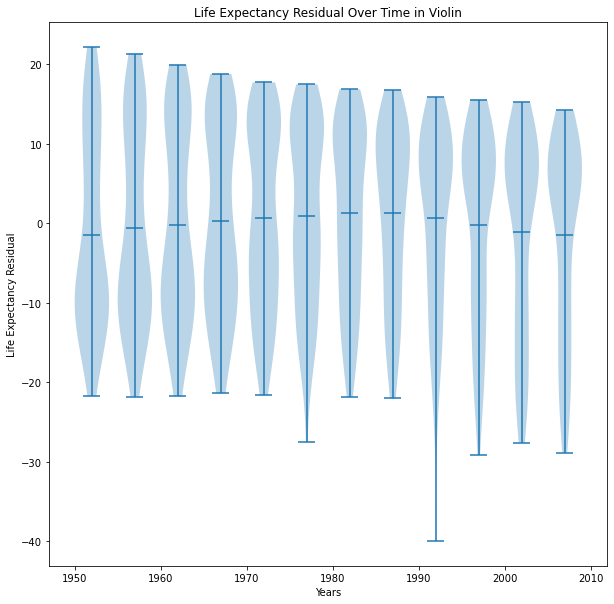

In [51]:
# setting figure size and assigning graph title and x & y labels
plt.figure(figsize=(10,10))
plt.title('Life Expectancy Residual Over Time in Violin')
plt.xlabel('Years')
plt.ylabel('Life Expectancy Residual')

# cycling through and adding every country's life expectancy residual per year in a list
lfst = []
for y in data['year'].unique(): 
    data_y = data[data['year'] == y]
    lfst.append(data_y['residual_life'])

# plotting violin graph
plt.violinplot(lfst, data['year'].unique(), widths=4, showmeans=True)
plt.show()

## Question 8: Does the plot of Exercise 3 match your expectations (as you answered Question 4)?

Yes, this violin graph turns out to **NOT** be normally distributed hence it is not N(0, σ^2). The distribution is almost the exact same as the earlier violin plot which is multimodal, asymmetric, and skewed.

## Exercise 4: Make a boxplot (or violin plot) of model residuals vs. continent.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f70e6935eb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f70e41cc310>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f70e6941eb0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f70e4226370>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f70e4210130>,
 'means': []}

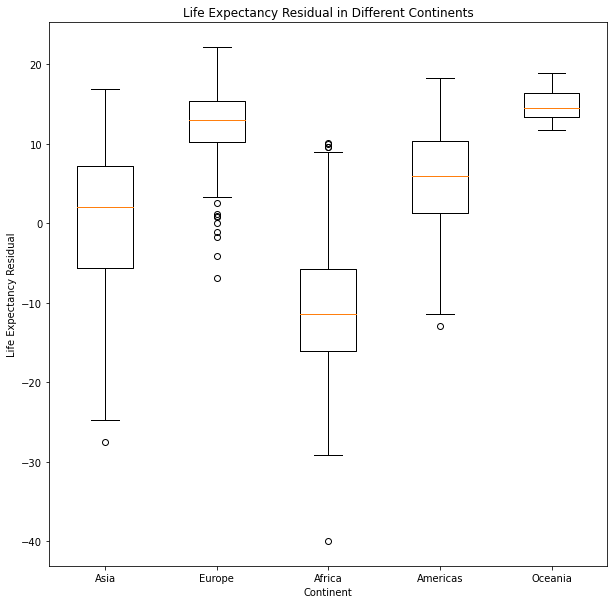

In [60]:
# setting figure size and assigning graph title and x & y labels
plt.figure(figsize=(10,10))
plt.title('Life Expectancy Residual in Different Continents')
plt.xlabel('Continent')
plt.ylabel('Life Expectancy Residual')

plot_lst = []
for cont in data['continent'].unique(): 
    data_cont = data[data['continent'] == cont]
    plot_lst.append(data_cont['residual_life'])

plt.boxplot(plot_lst, labels=data['continent'].unique())

## Question 9: Is there a dependence between model residual and continent? If so, what would that suggest when performing a regression analysis of life expectancy across time?

Yes there looks to be a dependence between the model residual and the continent. This suggests that we need to include the continent(s) as a maybe indicator variable in our regression because continent can clearly explain some of the variation present within life expectancy. Hence to improve our explanatory factor of the model, we should include continent.

## Exercise 5: As in the Moneyball project, make a scatter plot of life expectancy vs. year, grouped by continent, and add a regression line. The result here can be given as either one scatter plot per continent, each with its own regression line, or a single plot with each continent's points plotted in a different color, and one regression line per continent's points. The former is probably easier to code up.

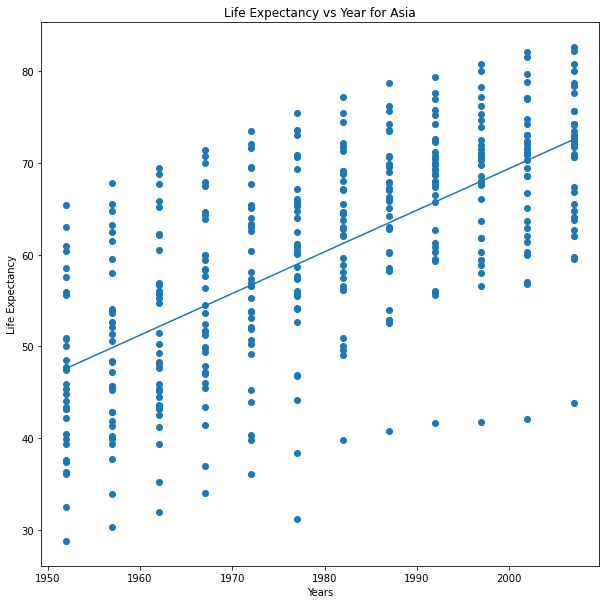

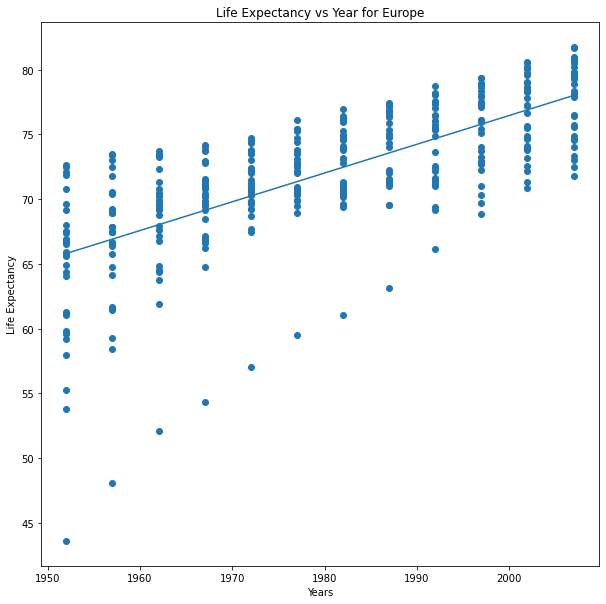

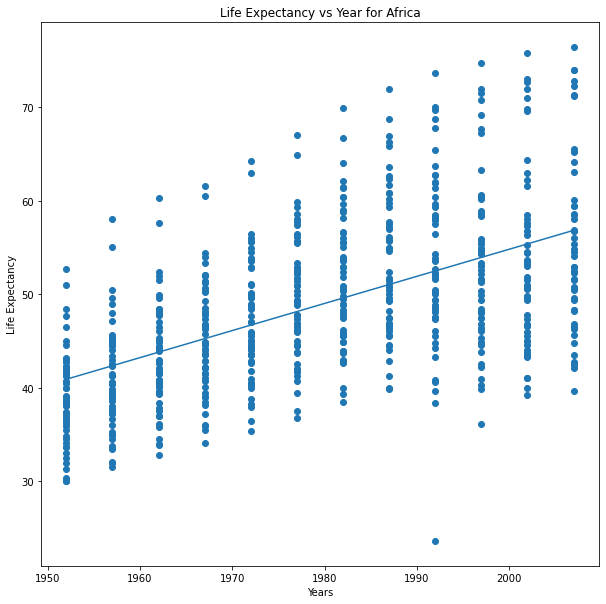

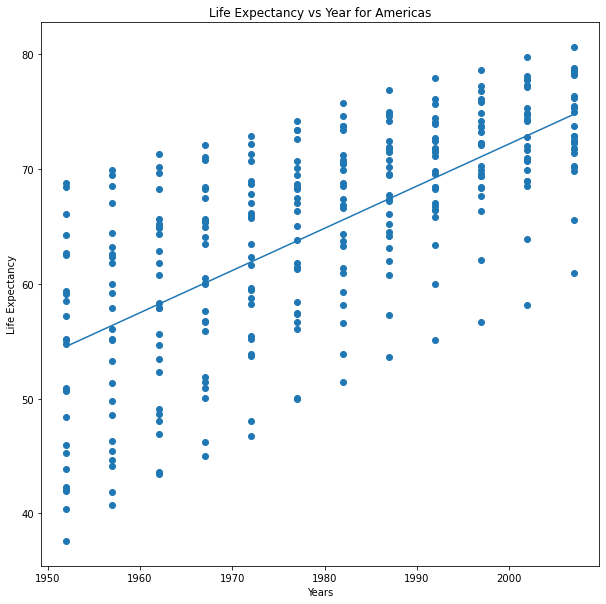

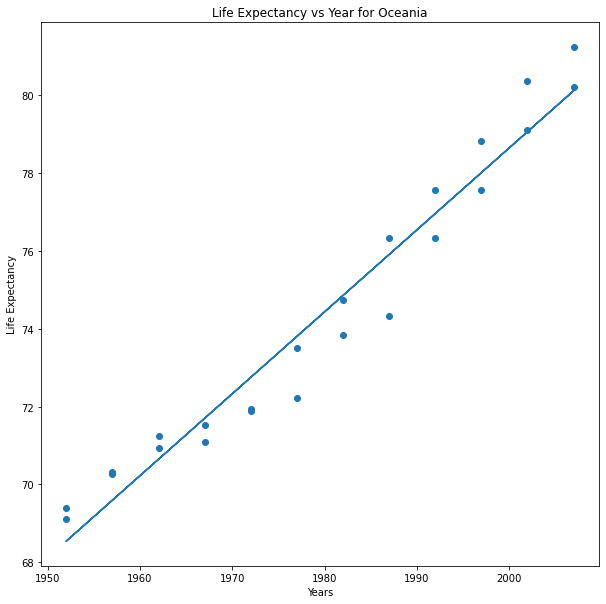

In [63]:
for cont in data['continent'].unique():
    data_cont = data[data['continent'] == cont]
    plt.figure(figsize=(10,10))
    plt.title('Life Expectancy vs Year for {}'.format(cont))
    plt.xlabel('Years')
    plt.ylabel('Life Expectancy')
    x = data_cont['year']
    y = data_cont['life_exp']
    m, b = np.polyfit(x,y,1)
    plt.scatter(x,y)
    plt.plot(x, m*x+b)
    plt.show()

## Question 10: Based on this plot, should your regression model include an interaction term for continent and year? Why?

Yes because the regressions (slopes and interecept) are very different across the different continents, hence we should include the continent as a feature in our aggregate regression.

## Exercise 6: Fit a linear regression model for life expectancy including a term for an interaction between continent and year. Print out the model in a readable format, e.g., print the coefficients of the model (no need to plot). Hint: adding interaction terms is a form of feature engineering, like we discussed in class (think about, e.g., using (a subset of) polynomial features here).

In [65]:
model_classic = ols(formula='life_exp~year*continent', data=data).fit()
print(model_classic.summary())

                            OLS Regression Results                            
Dep. Variable:               life_exp   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     424.3
Date:                Tue, 27 Apr 2021   Prob (F-statistic):               0.00
Time:                        02:35:59   Log-Likelihood:                -5771.9
No. Observations:                1704   AIC:                         1.156e+04
Df Residuals:                    1694   BIC:                         1.162e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

## Question 11: Are all parameters in the model significantly different from zero? If not, which are not significantly different from zero?

Most are as they have significantly large critical values leading to p-values being 0 implying that the null hypothesis of the parameter being irrelevant to the regression (B=0) is highly unlikely. However, Ocenia has a p-value of 0.287 without interaction, and 0.360 with interaction implying that it is possible for the true parameter to be 0 (as it is possible for us to get a sample such as this with the param = 0).

## Question 12: On average, by how much does life expectancy increase each year for each continent? (Provide code to answer this question by extracting relevant estimates from model fit)

In [67]:
print(model_classic.params)

Intercept                    -524.257846
continent[T.Americas]        -138.848447
continent[T.Asia]            -312.633049
continent[T.Europe]           156.846852
continent[T.Oceania]          182.349883
year                            0.289529
year:continent[T.Americas]      0.078122
year:continent[T.Asia]          0.163593
year:continent[T.Europe]       -0.067597
year:continent[T.Oceania]      -0.079257
dtype: float64


Average Change in life expectancy Africa per year => 0.289529

Average Change in life expectancy Americas per year => 0.078122

Average Change in life expectancy Asia per year => 0.163593

Average Change in life expectancy Europe per year => -0.067597

Average Change in life expectancy Ocenia per year => -0.079257

## Exercise 7: Make a residuals vs. year violin plot for the interaction model. Comment on how well it matches assumptions of the linear regression model.

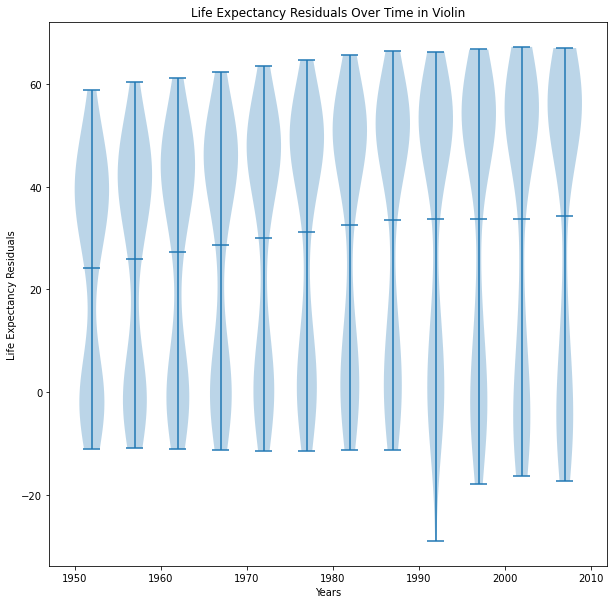

In [69]:
# cloning data
# viol_data = data[['continent', 'year', 'life_exp']]

# viol_data['residuals'] = 0.0

afr_data = data[data['continent'] == 'Africa']
afr_data = afr_data[['continent', 'year', 'life_exp']]
afr_data['residuals'] = afr_data['life_exp'] - (model_classic.params[5]*afr_data['year'] + model_classic.params[0])

eur_data = data[data['continent'] == 'Europe']
eur_data = eur_data[['continent', 'year', 'life_exp']]
eur_data['residuals'] = eur_data['life_exp'] - (model_classic.params[8]*eur_data['year'] + model_classic.params[3])

oce_data = data[data['continent'] == 'Ocenia']
oce_data = oce_data[['continent', 'year', 'life_exp']]
oce_data['residuals'] = oce_data['life_exp'] - (model_classic.params[9]*oce_data['year'] + model_classic.params[4])

asi_data = data[data['continent'] == 'Asia']
asi_data = asi_data[['continent', 'year', 'life_exp']]
asi_data['residuals'] = asi_data['life_exp'] - (model_classic.params[7]*asi_data['year'] + model_classic.params[2])

ame_data = data[data['continent'] == 'Americas']
ame_data = ame_data[['continent', 'year', 'life_exp']]
ame_data['residuals'] = ame_data['life_exp'] - (model_classic.params[6]*ame_data['year'] + model_classic.params[1])


frames = [afr_data, eur_data, oce_data, asi_data, ame_data]
data_viol = pd.concat(frames)


# setting figure size and assigning graph title and x & y labels
plt.figure(figsize=(10,10))
plt.title('Life Expectancy Residuals Over Time in Violin')
plt.xlabel('Years')
plt.ylabel('Life Expectancy Residuals')

# # cycling through and adding every country's life expectancy per year in a list
lfst = []
for y in data_viol['year'].unique(): 
    data_y = data_viol[data_viol['year'] == y]
    lfst.append(data_y['residuals'])

# plotting violin graph
plt.violinplot(lfst, data_viol['year'].unique(), widths=4, showmeans=True)
plt.show()

# Part 2: Classification

## Problem 1 Implement the gradient descent algorithm (either batch or stochastic versions) for multiple linear regression. I.e., extend the version of the algorithm we discussed in class to multiple parameters.

This is a **batch gradient descent implementation** (batch gradients are better because they average out any outliers in the underlying training data). It is optimized for the Mean Squared Error loss function via available matrix multiplication rules.

In [138]:
# calculates Mean Squared Error 
# X -> (batch_size, n) training data OR if last batch (left over, n)
# y -> (n,) labels
# w -> (n,) weights
# b -> (1,) bias
def MSE(X, y, w, b):
    # returns effectively SUM(w.dot(x_i) + b - y_i, from 1 to m)/m
    return np.square(X.dot(w) + b - y).mean()

# calculates Mean Squared Error Gradient vector for w
# X -> (batch_size, n) training data
# y -> (n,) labels
# w -> (n,) weights
# b -> (1,) bias
def grad_MSE(X,y,w,b):
    return (2/len(y)) * X.T.dot(X.dot(w) + b - y)

In [139]:
# calculates optimized weights (w) and bias (b)
# X -> (m,n) training data
# y -> (n,) labels
# learning_rate -> size of step as you traverse the loss curve => HYPERPARAM
# epochs -> number of training epochs we need to take          => HYPERPARAM
# batch_size -> size of batches to train                       => HYPERPARAM
def mlr_gradient_descent(X, y, learning_rate, epochs : int, batch_size : int):
    # initializing weights, bias, and loss
    # m = # of obs, n = dimensionality
    m,n = X.shape
    w = np.zeros(n)
    b = 0
    loss = np.zeros(epochs)
    
    # splitting data into batches
    num_batches = int(m/batch_size)
    extra_at_end = int(m % batch_size)
    
    x_batches = np.split(X[:num_batches*batch_size], batch_size)
    x_last_batch = X[num_batches*batch_size:]
    
    y_batches = np.split(y[:num_batches*batch_size], batch_size)
    y_last_batch = y[num_batches*batch_size:]
    
    
    # training loop 
    for ep in range(epochs):
        # + 1 for the extra batch at end ie last_batch
        epoch_loss = np.zeros(num_batches + 1) 
        
        # cycling through every batch
        for i in range(num_batches):
            # saving the loss in this batch
            epoch_loss[i] = MSE(x_batches[i], y_batches[i], w, b)

            # calculating gradient of this batch
            G = grad_MSE(x_batches[i], y_batches[i], w, b)
            
            # updating params
            w = w - learning_rate * G
            b = b - learning_rate * (2/m) * np.sum(x_batches[i].dot(w) + b - y_batches[i])
        
        # doing last batch in case we had a batch size that didn't evenly divide training data
        if x_last_batch.size != 0:
            # saving the loss of the last batch 
            epoch_loss[num_batches] = MSE(x_last_batch, y_last_batch, w, b)
            
            # calculating gradient of the last batch
            G = grad_MSE(x_last_batch, y_last_batch, w, b)
            
            # updating params
            w = w - learning_rate * G
            b = b - learning_rate * (2/m) * np.sum(x_last_batch.dot(w) + b - y_last_batch)
        
        # saving loss of this epoch
        loss[ep] = np.mean(epoch_loss)
    
    return w, b, loss

## Problem 2: Implement the gradient descent algorithm (either batch or stochastic versions) for multiple logistic regression. I.e., modify your code in problem 1 for the logistic regression update equation.

## Make sure you include in your submission writeup, which version of the algorithm you are solving (stochastic or batch), and make sure to comment your code to help us understand your implementation.

This code is going to be effectively similar to the code above because we isolated loss and gradient calculations. Hence, we just need to change up the MSE and grad_MSE functions such that they produce appropriate outputs for a logistic regression. 

I deleted the loss function because it was unnecessarily complicated, and hence I just used the gradient function and log_odds function. 

The **gradient descent** function requires that the first element in each vector be 1 to represent the x_0 = 1 element.

In [131]:
def log_odds(x, w, b):
    # calculates direct output of linear reg
    out = x.dot(w) + b
    # calculates the actual log-odds given the output of lin reg
    return np.exp(out)/(1 + np.exp(out))

# calculates gradient for log regression
def log_grad_MSE(X, y, w, b):
    grad = 0
    for i in range(len(X)):
        grad += (y[i] - log_odds(X[i], w, b)) * X[i]
    return grad

In [132]:
def log_gradient_descent(X, y, learning_rate, epochs : int, batch_size : int):
    # initializing weights, bias, and loss
    # m = # of obs, n = dimensionality
    m,n = X.shape
    w = np.zeros(n)
    b = 0
    
    # splitting data into batches
    num_batches = int(m/batch_size)
    extra_at_end = int(m % batch_size)
    
    x_batches = np.split(X[:num_batches*batch_size], batch_size)
    x_last_batch = X[num_batches*batch_size:]
    
    y_batches = np.split(y[:num_batches*batch_size], batch_size)
    y_last_batch = y[num_batches*batch_size:]
    
    
    # training loop 
    for ep in range(epochs):      
        # cycling through every batch
        for i in range(num_batches):
            # calculating gradient of this batch
            G = log_grad_MSE(x_batches[i], y_batches[i], w, b)
            # updating params
            w = w + learning_rate * G
            b = b + learning_rate * np.sum(y_batches[i] - log_odds(x_batches[i], w, b))
        
        # doing last batch in case we had a batch size that didn't evenly divide training data
        if x_last_batch.size != 0:
            # calculating gradient of the last batch
            G = log_grad_MSE(x_last_batch, y_last_batch, w, b)
            # updating params
            w = w + learning_rate * G
            b = b + learning_rate * np.sum(y_last_batch - log_odds(x_last_batch, w, b))
    
    return w, b

## Problem 3:

### To test your programs, simulate data from the linear regression and logistic regression models and check that your implementations recover the simulation parameters properly.

In [114]:
from sklearn import datasets
# Generate data for linear regression:
gen_data_x, gen_data_y = datasets.make_regression(n_samples=100, n_features=20, noise = 1.5)

# Generate data for logistic regression. This is similar to linear, only now values are either 0 or 1.  
log_gen_data_x, dump_y = datasets.make_regression(n_samples=100, n_features=20, noise = 1.5)
log_gen_data_y = np.array([0 if i>0 else 1 for i in dump_y])

In [115]:
gen_data_x.shape

(100, 20)

Training models via our gradient descent algorithm

In [141]:
w_log, b_log = log_gradient_descent(log_gen_data_x, log_gen_data_y, learning_rate=0.001, epochs=10, batch_size=10)
w_reg, b_reg, loss = mlr_gradient_descent(gen_data_x, gen_data_y, learning_rate=0.001, epochs=10, batch_size=10)

Training models via sklearn

In [147]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(gen_data_x, gen_data_y)
log_reg = linear_model.LogisticRegression()
log_reg.fit(log_gen_data_x, log_gen_data_y)

LogisticRegression()

Plotting values for the regular linear regressoin

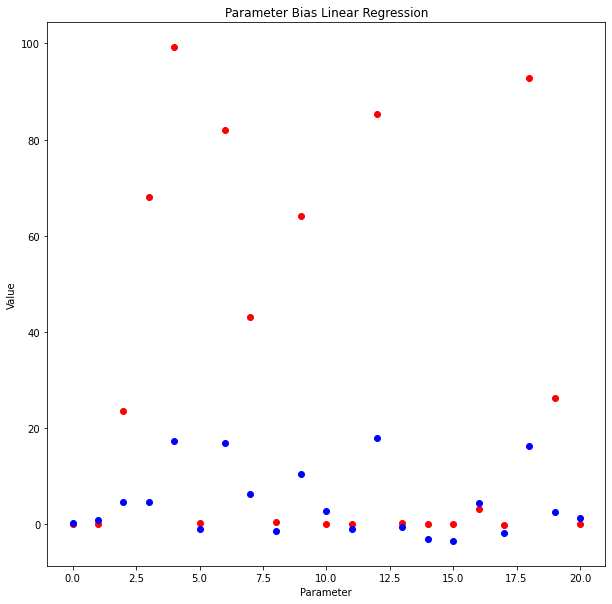

SKLEARNS IN RED
OURS IN BLUE


In [157]:
# setting size of graph
plt.figure(figsize=(10,10))
# setting labels and titles of graph
plt.title('Parameter Bias Linear Regression')
plt.xlabel('Parameter')
plt.ylabel('Value')

# prepping data for scatter
sk_linreg_agg = np.insert(lin_reg.coef_, 0, lin_reg.intercept_)
ours_linreg_agg = np.insert(w_reg, 0, b_reg)
plt.scatter([x for x in range(20+1)], sk_linreg_agg, c='red')
plt.scatter([x for x in range(20+1)], ours_linreg_agg, c='blue')
plt.show()
print('SKLEARNS IN RED')
print('OURS IN BLUE')

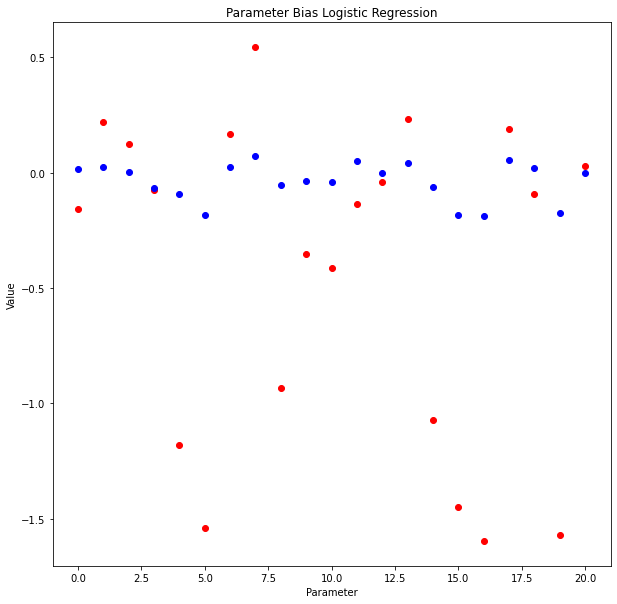

SKLEARNS IN RED
OURS IN BLUE


In [159]:
# setting size of graph
plt.figure(figsize=(10,10))
# setting labels and titles of graph
plt.title('Parameter Bias Logistic Regression')
plt.xlabel('Parameter')
plt.ylabel('Value')

# prepping data for scatter
sk_logreg_agg = np.insert(log_reg.coef_, 0, log_reg.intercept_)
ours_lonreg_agg = np.insert(w_log, 0, b_log)
plt.scatter([x for x in range(20+1)], sk_logreg_agg, c='red')
plt.scatter([x for x in range(20+1)], ours_lonreg_agg, c='blue')
plt.show()
print('SKLEARNS IN RED')
print('OURS IN BLUE')

Our gradient descent algorithm works farely well. I did not train with enough epochs and/or with a low/high learning rate and/or a higher batch size. There are a wide number of hyperparameters that can be fine tuned s.t. we get our models to converge to the sklearn models.